<a href="https://colab.research.google.com/github/CongDanh15/BT-AI/blob/main/Day4_Rainfall_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a56a5be406fe7c68e1c291d051d9abe83226b75140f1a0c41f030dda2e484438
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nhập nhiệt độ (từ 20.4 đến 41.2 (đơn vị độ C)) : 30
Nhập thời gian (từ 0.7 đến 3.1 (đơn vị m/s)) : 3
Lượng mưa là:  6.1 mm


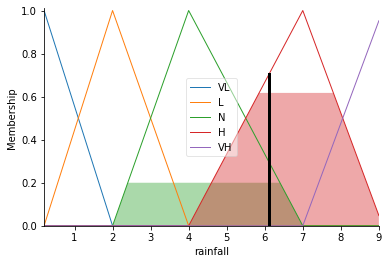

In [ ]:
#-----------main
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temp=ctrl.Antecedent(np.arange(21.4,41.2,1),'temp')
ws = ctrl.Antecedent(np.arange(0.7,3.1,0.1),'ws')
rainfall=ctrl.Consequent(np.arange(0.2,9.1,0.1),'rainfall')


#----------chia khoang
#---temperature
temp['VL']=fuzz.trimf(temp.universe,[21.4,21.4,26])
temp['L']=fuzz.trimf(temp.universe,[21.4,26,31])
temp['N']=fuzz.trimf(temp.universe,[26,31,36])
temp['H']=fuzz.trimf(temp.universe,[31,36,41.2])
temp['VH']=fuzz.trimf(temp.universe,[36,41.2,41.2])


#------WINSPEED
ws['VL']=fuzz.trimf(ws.universe,[0.7,0.7,1.3])
ws['L']=fuzz.trimf(ws.universe,[0.7,1.3,1.9])
ws['N']=fuzz.trimf(ws.universe,[1.3,1.9,2.5])
ws['H']=fuzz.trimf(ws.universe,[1.9,2.5,3.31])
ws['VH']=fuzz.trimf(ws.universe,[2.5,3.31,3.31])

#rainfallouput
rainfall['VL']=fuzz.trimf(rainfall.universe, [0.2,0.2,2])
rainfall['L']=fuzz.trimf(rainfall.universe, [0.2,2,4])
rainfall['N']=fuzz.trimf(rainfall.universe, [2,4,7])
rainfall['H']=fuzz.trimf(rainfall.universe, [4,7,9.1])
rainfall['VH']=fuzz.trimf(rainfall.universe, [7,9.1,9.1])

#---------Rule
rule1 = ctrl.Rule(temp['VL']&ws['VL'], rainfall['VL'])
rule2 = ctrl.Rule(temp['VL']&ws['L'], rainfall['VL'])
rule3 = ctrl.Rule(temp['VL']&ws['N'], rainfall['VL'])
rule4 = ctrl.Rule(temp['VL']&ws['H'], rainfall['H'])
rule5 = ctrl.Rule(temp['VL']&ws['VH'], rainfall['VH'])

rule6 = ctrl.Rule(temp['L']&ws['VL'], rainfall['VL'])
rule7 = ctrl.Rule(temp['L']&ws['L'], rainfall['VL'])
rule8 = ctrl.Rule(temp['L']&ws['N'], rainfall['N'])
rule9 = ctrl.Rule(temp['L']&ws['H'], rainfall['N'])
rule10 = ctrl.Rule(temp['L']&ws['VH'], rainfall['H'])

rule11 = ctrl.Rule(temp['N']&ws['VL'], rainfall['N'])
rule12 = ctrl.Rule(temp['N']&ws['L'], rainfall['N'])
rule13 = ctrl.Rule(temp['N']&ws['N'], rainfall['N'])
rule14 = ctrl.Rule(temp['N']&ws['H'], rainfall['H'])
rule15 = ctrl.Rule(temp['N']&ws['VH'], rainfall['H'])

rule16 = ctrl.Rule(temp['H']&ws['VL'], rainfall['L'])
rule17 = ctrl.Rule(temp['H']&ws['L'], rainfall['L'])
rule18 = ctrl.Rule(temp['H']&ws['N'], rainfall['L'])
rule19 = ctrl.Rule(temp['H']&ws['H'], rainfall['H'])
rule20 = ctrl.Rule(temp['H']&ws['VH'], rainfall['VH'])

rule21 = ctrl.Rule(temp['VH']&ws['VL'], rainfall['N'])
rule22 = ctrl.Rule(temp['VH']&ws['L'], rainfall['L'])
rule23 = ctrl.Rule(temp['VH']&ws['N'], rainfall['L'])
rule24 = ctrl.Rule(temp['VH']&ws['H'], rainfall['VH'])
rule25 = ctrl.Rule(temp['VH']&ws['VH'], rainfall['VH'])



RAINFALLING_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule20,rule21,rule22,rule23,rule24,rule25])
RAINFALLING = ctrl.ControlSystemSimulation(RAINFALLING_ctrl)

RAINFALLING.input['temp']=float(input("Nhập nhiệt độ (từ 20.4 đến 41.2 (đơn vị độ C)) : "))
RAINFALLING.input['ws']=float(input("Nhập thời gian (từ 0.7 đến 3.1 (đơn vị m/s)) : "))
RAINFALLING.compute()

print("Lượng mưa là: " ,round((RAINFALLING.output['rainfall']),1),"mm")

'''temp.view()
ws.view()'''
rainfall.view(sim=RAINFALLING)
